#### simple linear regression: y = w0 + w1x1 형태

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('regerssion_data/Salary_Data.csv').values
print(dataset)
print(dataset.shape)
# 첫번째 열: 경력(년)
# 두번째 열: 연봉(달러)
# 목표: 경력(년)을 통해 연봉을 예측하는 linear regression model 생성

[[1.10000e+00 3.93430e+04]
 [1.30000e+00 4.62050e+04]
 [1.50000e+00 3.77310e+04]
 [2.00000e+00 4.35250e+04]
 [2.20000e+00 3.98910e+04]
 [2.90000e+00 5.66420e+04]
 [3.00000e+00 6.01500e+04]
 [3.20000e+00 5.44450e+04]
 [3.20000e+00 6.44450e+04]
 [3.70000e+00 5.71890e+04]
 [3.90000e+00 6.32180e+04]
 [4.00000e+00 5.57940e+04]
 [4.00000e+00 5.69570e+04]
 [4.10000e+00 5.70810e+04]
 [4.50000e+00 6.11110e+04]
 [4.90000e+00 6.79380e+04]
 [5.10000e+00 6.60290e+04]
 [5.30000e+00 8.30880e+04]
 [5.90000e+00 8.13630e+04]
 [6.00000e+00 9.39400e+04]
 [6.80000e+00 9.17380e+04]
 [7.10000e+00 9.82730e+04]
 [7.90000e+00 1.01302e+05]
 [8.20000e+00 1.13812e+05]
 [8.70000e+00 1.09431e+05]
 [9.00000e+00 1.05582e+05]
 [9.50000e+00 1.16969e+05]
 [9.60000e+00 1.12635e+05]
 [1.03000e+01 1.22391e+05]
 [1.05000e+01 1.21872e+05]]
(30, 2)


In [5]:
# X와 y 분리
# ※ sklearn을 이용할 때, 항상 X는 2D 이상이어야 함
X = dataset[:,:-1]
# 또는 X = dataset[:,0].reshape(-1,1)
y = dataset[:,-1]
print(X.shape, y.shape)

(30, 1) (30,)


In [6]:
# training data와 test data분리
from sklearn.model_selection import train_test_split
# 전체 데이터의 20%를 테스트 데이터로 사용
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [7]:
# shape을 이용하여 데이터의 수와 X를 구성하는 특징(요소)의 수 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24, 1) (6, 1) (24,) (6,)


## Linear regression model 생성

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 생성할 LinearRegression의 이름 지정 (LinearRegression 객체 생성)

# 학습(X_train, y_train)
lr.fit(X_train,y_train)
# 학습 결과(가중치와 편향)가 lr 객체 안에 저장됨

LinearRegression()

In [12]:
# 새로운 x(경력)에 대한 연봉 예측하기
# ex> 경력이 5년이면 연봉은 얼마인가?
# 예측 -> predict
# 학습할 때, 적용한 X_train이 2D array이므로, predict에서도 2D 형태로 입력되어야 함
# ※ 대괄호 2개 -> 2D
lr.predict([[5],[10]])

array([ 72274.62168832, 118939.34537828])

In [14]:
# test data를 입력으로 한, 예측값
y_pred = lr.predict(X_test)
print(y_pred)

[75074.50510972 91873.8056381  62008.38247653 81607.56642631
 67608.14931932 89073.92221671]


In [18]:
# np.arange(a,b,c): a부터 b까지 c 간격으로 1D array 생성 (단, b는 포함하지 않음)
np.arange(-10,10,3)

array([-10,  -7,  -4,  -1,   2,   5,   8])

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 34942.84273635  44275.78747434  53608.73221233  62941.67695033
  72274.62168832  81607.56642631  90940.5111643  100273.4559023
 109606.40064029 118939.34537828 128272.29011627 137605.23485427]


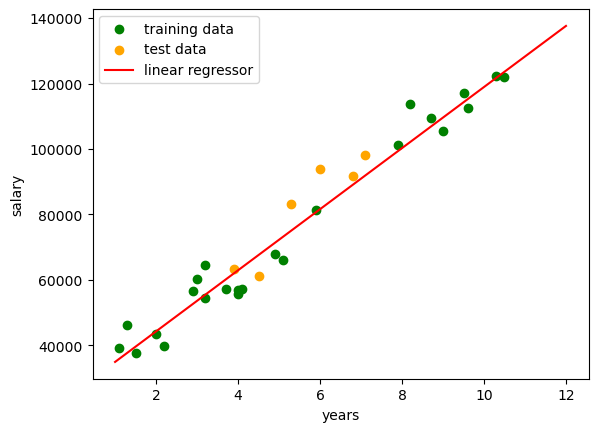

In [22]:
# 결과 시각화
# 가로축 경력(년), 세로축 연봉
plt.scatter(X_train,y_train,color='green',label='training data')
plt.scatter(X_test,y_test,label='test data',color='orange')

# 임의의 x축 값 생성
years = np.arange(1,13,1)
# 위 임의의 값에 대한 예측 salary값
# ※ 입력은 2D array가 되어야 함
salary = lr.predict(years.reshape(-1,1))
print(years)
print(salary)

# lr model을 선차트로 시각화
plt.plot(years,salary,color='red',label='linear regressor')
plt.xlabel('years')
plt.ylabel('salary')
plt.legend() # label을 차트에 표시함